## Boston Housing Data Set

### Assignment Goals:
- Build Machine Learning model to predict Category of Income of an individual
- Use pipeline and grid search to build strategy for experimenting your ML model 

### Load Libraries

In [1]:
! pip install graphviz

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

##### Scikit Learn modules needed for Logistic Regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Library to store and load models
import joblib

# Plotting libraries
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

### Load Data

In [2]:
df = pd.read_csv("boston_housing_data.csv")
df.head()

,Id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,native_country,income
0,A1,39,State-gov,77516,Bachelors,13,Never_married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,A2,50,Self-emp-not-inc,83311,Bachelors,13,Married_civ_spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,A3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,A4,53,Private,234721,11th,7,Married_civ_spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,A5,28,Private,338409,Bachelors,13,Married_civ_spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
income_onhot = pd.get_dummies(df['sex'])
income_onhot.head(10)

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0
7,0,1
8,1,0
9,0,1


In [4]:
# Create input dataset aka X
x = pd.merge(df[['age','education_num','capital_gain','capital_loss','hr_per_week']], income_onhot,  left_index=True, right_index=True)
x.head(10)

,age,education_num,capital_gain,capital_loss,hr_per_week,Female,Male
0,39,13,2174,0,40,0,1
1,50,13,0,0,13,0,1
2,38,9,0,0,40,0,1
3,53,7,0,0,40,0,1
4,28,13,0,0,40,1,0
5,37,14,0,0,40,1,0
6,49,5,0,0,16,1,0
7,52,9,0,0,45,0,1
8,31,14,14084,0,50,1,0
9,42,13,5178,0,40,0,1


                    age  education_num  capital_gain  capital_loss  \
age            1.000000       0.036527      0.077674      0.057775   
education_num  0.036527       1.000000      0.122630      0.079923   
capital_gain   0.077674       0.122630      1.000000     -0.031615   
capital_loss   0.057775       0.079923     -0.031615      1.000000   
hr_per_week    0.068756       0.148123      0.078409      0.054256   
Female        -0.088832      -0.012280     -0.048480     -0.045567   
Male           0.088832       0.012280      0.048480      0.045567   

               hr_per_week    Female      Male  
age               0.068756 -0.088832  0.088832  
education_num     0.148123 -0.012280  0.012280  
capital_gain      0.078409 -0.048480  0.048480  
capital_loss      0.054256 -0.045567  0.045567  
hr_per_week       1.000000 -0.229309  0.229309  
Female           -0.229309  1.000000 -1.000000  
Male              0.229309 -1.000000  1.000000  


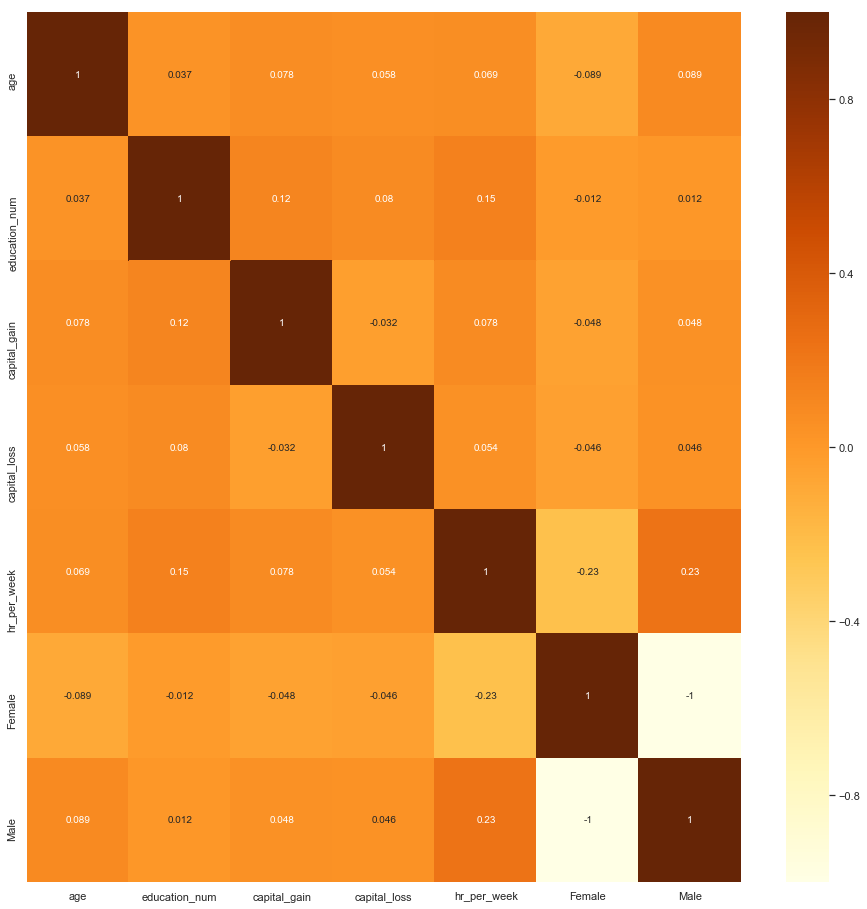

In [5]:
# Explore data visually
# Build Correlation Matrix to study multi collinearity
correlation = x.iloc[:,:7].corr()
print(correlation)

fig , ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(16)    
sns.heatmap(correlation,annot=True,cmap="YlOrBr")

In [7]:
# Encoding of categorical class variable to integers which will be used for feeding the model
le = LabelEncoder()
le_encoded = le.fit_transform(df['income'])
#le_encoded = le.transform(le)
print((le.classes_))
print(le_encoded)

['<=50K' '>50K']
[0 0 0 ... 0 0 1]


In [9]:
# Step3: Split data in train & test set
X_train, X_test, y_train, y_test = train_test_split(x,le_encoded,test_size=0.20, random_state=42)
print('Shape of Training Xs:{}'.format(X_train.shape))
print('Shape of Test Xs:{}'.format(X_test.shape))

Shape of Training Xs:(26048, 7)
Shape of Test Xs:(6513, 7)


In [10]:
# Build Model
clf = RandomForestClassifier(criterion= "entropy")
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
score=clf.score(X_test,y_test);#testing the linear regression model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
print(score)
print(y_predicted)

0.8157531091662829
[0 0 0 ... 1 0 0]


In [13]:
x.columns[0:10]

Index(['age', 'education_num', 'capital_gain', 'capital_loss', 'hr_per_week',
       'Female', 'Male'],
      dtype='object')

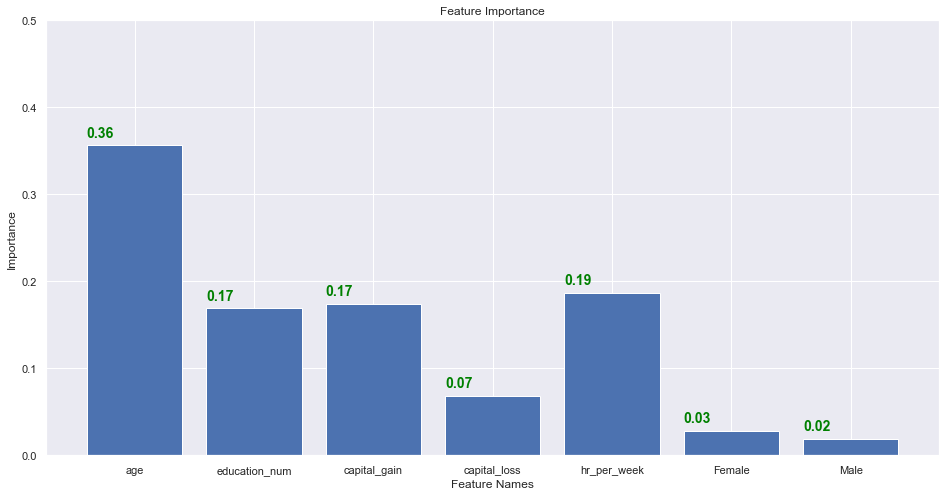

In [14]:
variableImp = pd.DataFrame({"Feature":x.columns[:7],"Importance":clf.feature_importances_})

fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
ax.bar(x = variableImp.Feature, height = variableImp.Importance)
#ax.barh(x = df['Gender'], height = np.mean(df.score))
ax.set_title('Feature Importance')
ax.set_xlabel('Feature Names')
ax.set_ylabel('Importance')
ax.set_ylim(top = 0.5)
for i, v in enumerate(variableImp.Importance):
    ax.text(i-0.4, v + 0.01, s = np.round(v,2), color='green', fontweight='bold',fontsize=14)

In [15]:
# Prediction on Test Data
y_predicted_labels = le.inverse_transform(y_predicted)
y_predicted_labels[0:10]

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '>50K',
       '<=50K', '>50K', '>50K'], dtype=object)

In [16]:
true_labels = le.inverse_transform(y_test)
true_labels[0:10]

array(['<=50K', '<=50K', '>50K', '<=50K', '<=50K', '>50K', '>50K',
       '<=50K', '<=50K', '>50K'], dtype=object)

### 8. Confusion Matrix

In [17]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(true_labels, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[4518,  424],
       [ 776,  795]], dtype=int64)

In [18]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[4518  424]
 [ 776  795]]
Normalized confusion matrix
[[0.91 0.09]
 [0.49 0.51]]


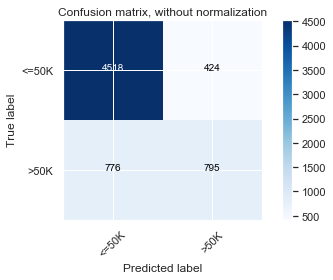

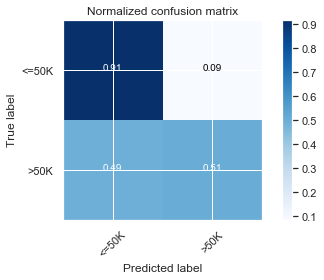

In [19]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= le.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Model 2.0 - using MinMax Scalar to preprocess data

In [20]:
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(x.iloc[:,:5])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [21]:
X_minmax

array([[0.3 , 0.8 , 0.02, 0.  , 0.4 ],
       [0.45, 0.8 , 0.  , 0.  , 0.12],
       [0.29, 0.53, 0.  , 0.  , 0.4 ],
       ...,
       [0.56, 0.53, 0.  , 0.  , 0.4 ],
       [0.07, 0.53, 0.  , 0.  , 0.19],
       [0.48, 0.53, 0.15, 0.  , 0.4 ]])

In [23]:
# Step3: Split data in train & test set
X_train, X_test, y_train, y_test = train_test_split(X_minmax,le_encoded,test_size=0.20, random_state=42)
print('Shape of Training Xs:{}'.format(X_train.shape))
print('Shape of Test Xs:{}'.format(X_test.shape))

Shape of Training Xs:(26048, 5)
Shape of Test Xs:(6513, 5)


In [24]:
# Build Model
clf = RandomForestClassifier(criterion= "entropy")
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
score=clf.score(X_test,y_test);#testing the linear regression model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
print(score)
print(y_predicted)

0.8142177184093352
[0 0 0 ... 1 0 0]


In [26]:
# Prediction on Test Data
y_predicted_labels = le.inverse_transform(y_predicted)
y_predicted_labels[0:10]

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '>50K',
       '<=50K', '<=50K', '>50K'], dtype=object)

In [27]:
true_labels = le.inverse_transform(y_test)
true_labels[0:10]

array(['<=50K', '<=50K', '>50K', '<=50K', '<=50K', '>50K', '>50K',
       '<=50K', '<=50K', '>50K'], dtype=object)

In [28]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(true_labels, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[4538,  404],
       [ 806,  765]], dtype=int64)

In [29]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[4538  404]
 [ 806  765]]
Normalized confusion matrix
[[0.92 0.08]
 [0.51 0.49]]


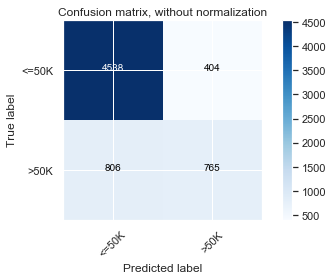

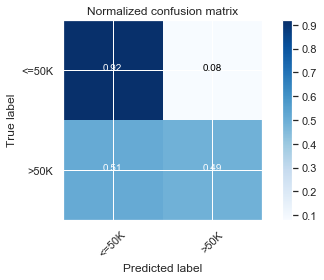

In [30]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= le.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Model 3.0 - using Standard Scalar to preprocess data

In [31]:
stdscalar = StandardScaler()
X_stdscalar = stdscalar.fit_transform(x.iloc[:,:5])
X_stdscalar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.03,  1.13,  0.15, -0.22, -0.04],
       [ 0.84,  1.13, -0.15, -0.22, -2.22],
       [-0.04, -0.42, -0.15, -0.22, -0.04],
       ...,
       [ 1.42, -0.42, -0.15, -0.22, -0.04],
       [-1.22, -0.42, -0.15, -0.22, -1.66],
       [ 0.98, -0.42,  1.89, -0.22, -0.04]])

In [32]:
# Step3: Split data in train & test set
X_train, X_test, y_train, y_test = train_test_split(X_stdscalar,le_encoded,test_size=0.20, random_state=42)
print('Shape of Training Xs:{}'.format(X_train.shape))
print('Shape of Test Xs:{}'.format(X_test.shape))

Shape of Training Xs:(26048, 5)
Shape of Test Xs:(6513, 5)


In [33]:
# Build Model
clf = RandomForestClassifier(criterion= "entropy")
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
score=clf.score(X_test,y_test);#testing the linear regression model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
print(score)
print(y_predicted)

0.8174420389989252
[0 0 0 ... 1 0 0]


In [35]:
# Prediction on Test Data
y_predicted_labels = le.inverse_transform(y_predicted)
y_predicted_labels[0:10]

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '>50K',
       '<=50K', '<=50K', '>50K'], dtype=object)

In [36]:
true_labels = le.inverse_transform(y_test)
true_labels[0:10]

array(['<=50K', '<=50K', '>50K', '<=50K', '<=50K', '>50K', '>50K',
       '<=50K', '<=50K', '>50K'], dtype=object)

In [37]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(true_labels, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[4555,  387],
       [ 802,  769]], dtype=int64)

In [38]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[4555  387]
 [ 802  769]]
Normalized confusion matrix
[[0.92 0.08]
 [0.51 0.49]]


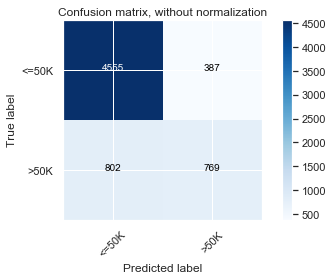

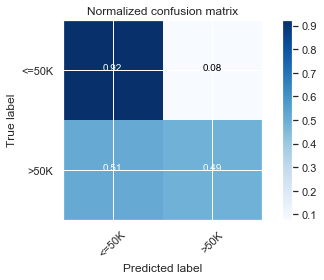

In [39]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= le.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()